In [1]:
#Nome: Miguel Augusto Silva Guida  RA: 174847
# Trabalho 1 MC920


import cv2
import numpy as np
import matplotlib.pyplot as plt

#1.1 Resolucao de Imagens

# Ideia inicial para reduzir resolucao da imagem pela metade,
#  mantendo os valores medios da vizinhanca 2x2 a cada reducao.
def reduce_resolution_in_half(img):
    new_dimension = int(len(img)/2)
    r = np.zeros((new_dimension,new_dimension,4))
    r[::,::,0] = img[::2, ::2]
    r[::,::,1] = img[1::2, ::2]
    r[::,::,2] = img[::2, 1::2]
    r[::,::,3] = img[1::2, 1::2]
    resized = np.floor(np.mean(r, axis=2))
    
    return resized

# Maneira mais eficiente de se reduzir uma imagem, utilizando cv2.resize(interpolation=cv2.INTER_AREA)
def reduce_resolution_in_half_vectorized(img):
    new_dimension =  int(len(img)/2)
    print(new_dimension)
    resized = cv2.resize(img,dsize=(new_dimension,new_dimension), interpolation=cv2.INTER_AREA)
    return resized

img = cv2.imread('input/baboon.png', cv2.IMREAD_GRAYSCALE)
dimension = img.shape[0]

# Gera imagens reduzidas. Guarda a imagem reduzida na variavel 'resized', e 
#  utiliza outra variavel 'saved' para receber a imagem reduzida e salvar na dimensao original (512x512).
resized = reduce_resolution_in_half_vectorized(img)
saved = cv2.resize(resized,dsize=(dimension,dimension), interpolation=cv2.INTER_AREA)
cv2.imwrite('output/baboon256.png', saved)
plt.imshow(resized, cmap='gray')
plt.show()

# Passa imagem resultante da reducao anterior como parametro para as proximas reducoes.
resized = reduce_resolution_in_half_vectorized(resized)
saved = cv2.resize(resized,dsize=(dimension,dimension), interpolation=cv2.INTER_AREA)
cv2.imwrite('output/baboon128.png', saved)
plt.imshow(resized, cmap='gray')
plt.show()

resized = reduce_resolution_in_half_vectorized(resized)
saved = cv2.resize(resized,dsize=(dimension,dimension), interpolation=cv2.INTER_AREA)
cv2.imwrite('output/baboon64.png', saved)
plt.imshow(resized, cmap='gray')
plt.show()

resized = reduce_resolution_in_half_vectorized(resized)
saved = cv2.resize(resized,dsize=(dimension,dimension), interpolation=cv2.INTER_AREA)
cv2.imwrite('output/baboon32.png', saved)
plt.imshow(resized, cmap='gray')
plt.show()

resized = reduce_resolution_in_half_vectorized(resized)
saved = cv2.resize(resized,dsize=(dimension,dimension), interpolation=cv2.INTER_AREA)
cv2.imwrite('output/baboon16.png', saved)
plt.imshow(resized, cmap='gray')
plt.show()

resized = reduce_resolution_in_half_vectorized(resized)
saved = cv2.resize(resized,dsize=(dimension,dimension), interpolation=cv2.INTER_AREA)
cv2.imwrite('output/baboon8.png', saved)
plt.imshow(resized, cmap='gray')
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
#1.2 Quantizacao de Imagens

img = cv2.imread('input/baboon.png', cv2.IMREAD_GRAYSCALE)

# Utiliza shift right nos pixels da imagem para reduzir a profundidade
#  para cada nivel, aumentamos a quantidade de bits no shift ate 7 shifts.
i = 1
while(i <= 7):
    img = cv2.imread('input/baboon.png', cv2.IMREAD_GRAYSCALE)
    img[:] = np.right_shift(img,i)
    print('baboon_'+str(int(256/2**i))+'niveis')
    # Para salvar a imagem, utilizamos o plt.imsave(), para adequarmos o novo intervalo de niveis de cinza.
    plt.imsave('output/baboon_'+str(int(256/2**i))+'niveis.png',img, vmin=0, vmax=((256/2**i)-1), cmap='gray', format='png')
    plt.imshow(img, cmap='gray')
    plt.show()
    i += 1


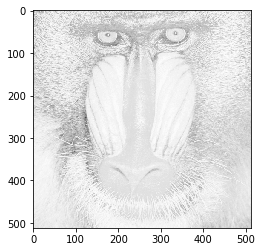

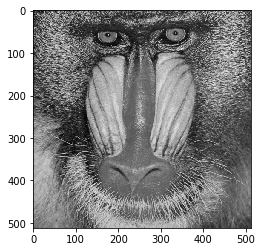

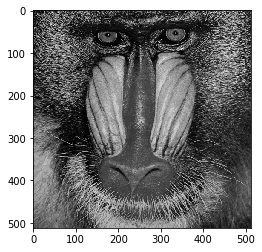

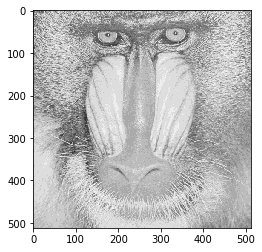

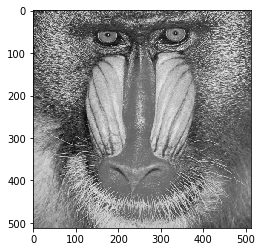

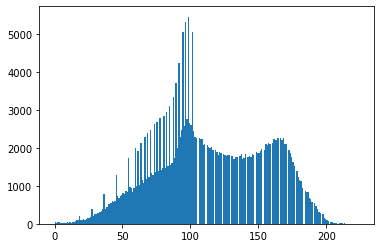

In [110]:
#1.3 Transformacoes Lineares e Nao Lineares

img = cv2.imread('input/baboon.png', cv2.IMREAD_GRAYSCALE)


# Transformacao Logaritmo (base 10)
# a*log10(f + 1)
a = 255/np.log(1+np.max(img))

img[:] = np.floor(a*np.log10(img + 1))
plt.imsave('output/baboon_logaritmo0.png',img, vmin=0, vmax=int(np.max(img)), cmap='gray', format='png')
# show image
plt.imshow(img, cmap='gray')
plt.show()
#plt.hist(img.ravel(),int(np.max(img)),[0,int(np.max(img))]); 
#plt.savefig("hist_logaritmo0.png")
#plt.show()

# Transformacao Exponencial
# a*(e^f - 1)
img = cv2.imread('input/baboon.png', cv2.IMREAD_GRAYSCALE)

ratio = 1/np.max(img) # constante para normalizar os valores dos pixels
a = (230/np.exp(1))   # constante para ajustar os niveis de cinza
img[:] = np.floor(a*(np.exp(img*ratio) -1))
plt.imsave('output/baboon_exponencial0.png',img, vmin=0, vmax=int(np.max(img)), cmap='gray', format='png')
# show image
plt.imshow(img, cmap='gray')
plt.show()
#plt.hist(img.ravel(),int(np.max(img)),[0,int(np.max(img))]); 
#plt.savefig("hist_exponencial0.png")
#plt.show()

# Transformacao Quadrado
# a*(f*f)
img = cv2.imread('input/baboon.png', cv2.IMREAD_GRAYSCALE)

ratio = 1/np.max(img) # constante para normalizar os valores dos pixels
a = np.max(img)       # constante para ajustar os niveis de cinza
img[:] = np.floor(np.multiply(img*ratio,img*ratio)* a)
plt.imsave('output/baboon_quadrado.png',img, vmin=0, vmax=int(np.max(img)), cmap='gray', format='png')
# show image
plt.imshow(img, cmap='gray')
plt.show()
#plt.hist(img.ravel(),int(np.max(img)),[0,int(np.max(img))]); 
#plt.savefig("hist_quadrado.png")
#plt.show()



# Transformacao Raiz Quadrada
# sqrt(f)
img = cv2.imread('input/baboon.png', cv2.IMREAD_GRAYSCALE)

img[:] = np.floor(np.sqrt(img))
plt.imsave('output/baboon_raiz_quadr.png',img, vmin=0, vmax=int(np.max(img)), cmap='gray', format='png')
# show image
plt.imshow(img, cmap='gray')
plt.show()
#plt.hist(img.ravel(),int(np.max(img)),[0,int(np.max(img))]); 
#plt.savefig("hist_raiz_quadr.png")
#plt.show()



# Alargamento de Contraste

img = cv2.imread('input/baboon.png', cv2.IMREAD_GRAYSCALE)

a = 64
b = 128
c = 255
alfa = 0.9
beta = 0.7
gama = 1.2
img = np.where(img <= 64, np.floor(alfa*img), 
              np.where((64< img)&(img <= 128), np.floor(beta*(img - a) + alfa*a)
                       ,np.floor(gama*(img - b) + beta*(b - a) + alfa*a)))
#print(np.max(img), np.min(img))
#print(img)
# show image
plt.imsave('output/baboon_alarg_contrstBalanced.png',img, vmin=0, vmax=int(np.max(img)), cmap='gray', format='png')
plt.imshow(img, cmap='gray')
plt.show()

plt.hist(img.ravel(),int(np.max(img)),[0,int(np.max(img))]);
plt.savefig("output/hist_alargamentoBalanced.png")
plt.show()